# Spykes IO

Example of how to import & wrangle data for plotting in spykes (installed via pip install spykes).

In [3]:
%load_ext autoreload
%autoreload 2

# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.io as spio
import os
from spykes.plot.neurovis import NeuroVis
import sys; sys.path.insert(0, '..')
from utils import *
sns.set_context("talk")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Below, I'm going to hard code some paths from the example_data. The protocol_info.mat has all the information about behavior & what the rat is doing, I'll load this in as a df w/ some helper functions. The ksphy_clusters_foranalysis.mat has output from phy that I've curated (via get_ksphy_results.m) and it has information on aligning between tetrode times & behavior times.

In [26]:
data_dir =  'C:\\Users\\brodylab\\Documents\\GitHub\\jbreda_PWM_ephys_analysis\\example_data\\data_sdc_20190902_145404_fromSD'
beh_mat   = 'protocol_info.mat'
spks_mat  = 'ksphy_clusters_foranalysis.mat'
sess_name = 'data_sdc_20190902_145404_fromSD'

# create paths
beh_path  = os.path.join(data_dir, beh_mat)
spks_path = os.path.join(data_dir, spks_mat)

# load & wrangle (see utils for functions & sub functions)
beh_df, spks_dict = load_and_wrangle(beh_path, spks_path, overwrite=True)

# get neurons into NeuroVis objects
# effectively what is happening here is i'm taking spike time for each neuron in the day & 
# creating a neurovis object for each neuron
neurons = initiate_neurons(spks_dict, "20190902")

..\utils.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beh_df['hit_hist'][beh_df['hit_hist'].isnull()] = "viol"


In [25]:
beh_df

,trial_num,hit_hist,delay,pair_hist,correct_side,prev_side,aud1_sigma,aud2_sigma,c_poke,end_state,hit_state,aud1_on,aud1_off,aud2_on,aud2_off
0,1,viol,6,9,RIGHT,NaN,0.008904,0.007300,476.563229,478.330221,NaN,NaN,NaN,NaN,NaN
1,2,viol,4,4,RIGHT,RIGHT,0.053144,0.019683,479.869221,481.457220,NaN,NaN,NaN,NaN,NaN
2,3,hit,6,3,RIGHT,RIGHT,0.019683,0.007290,482.048223,491.384224,490.309221,482.098232,482.498223,488.499224,488.898223
3,4,miss,2,9,RIGHT,RIGHT,0.008904,0.007300,498.909227,504.188223,502.903229,498.960232,499.360221,501.359229,501.759230
4,5,hit,2,6,LEFT,RIGHT,0.002700,0.007290,505.471227,510.643223,509.341221,505.522228,505.922229,507.922222,508.321227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,401,hit,2,2,RIGHT,LEFT,0.007290,0.002700,5227.210220,5232.558223,5231.212228,5227.260225,5227.660226,5229.661221,5230.061221
401,402,hit,2,12,LEFT,RIGHT,0.002704,0.007300,5241.322233,5246.522218,5245.159224,5241.373230,5241.773230,5243.773224,5244.173227
402,403,hit,2,14,LEFT,LEFT,0.005985,0.007300,5251.930228,5256.937232,5255.634227,5251.980234,5252.381230,5254.381225,5254.781231
403,404,viol,6,7,LEFT,LEFT,0.007290,0.019683,5261.118223,5269.656222,NaN,NaN,NaN,NaN,NaN


In [29]:
# event_ts_fsm = spike time in seconds converted aligned to behavior time
# note spks_dict is a kinda nasty nested dictionary, but the .mat file is helpful for refrencing
len(neurons), len(spks_dict['event_ts_fsm']) 

(4, 4)

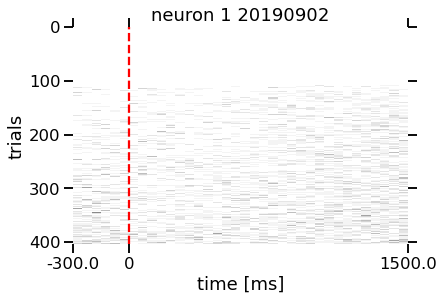

In [35]:
event = 'aud1_on'
condition = 'delay'
window = [-300, 1500]
binsize = 50
nn = 0 #neuron number

raster = neurons[nn].get_raster(event = event, df = beh_df,
                               window = window, binsize = binsize,
                               sortby = 'rate', sortorder='ascend')


In [36]:
# you can also just grab the raster dictionary & store it
raster = neurons[nn].get_raster(event = event, df = beh_df,
                               window = window, binsize = binsize,
                               sortby = 'rate', sortorder='ascend',
                               plot=False)

In [37]:
raster

{'event': 'aud1_on',
 'conditions': None,
 'window': [-300.0, 1500.0],
 'binsize': 50,
 'data': {0: array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 1, 0, 3],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=int64)}}

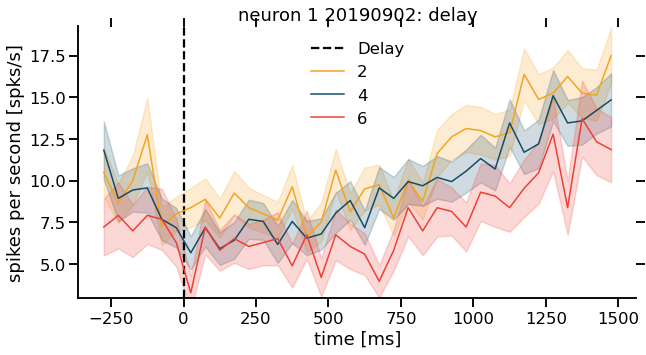

In [34]:
event = 'aud1_on'
condition = 'delay'
window = [-300, 1500]
binsize = 50

# you have to initialize figure for psth
plt.figure(figsize=(10,5))
psth = neurons[nn].get_psth(event = event,
                   conditions = condition,
                   df = beh_df,
                   window = window,
                   binsize = binsize,
                   event_name = 'Delay')

In [38]:
# same with psth
psth = neurons[nn].get_psth(event = event,
                   conditions = condition,
                   df = beh_df,
                   window = window,
                   binsize = binsize,
                   event_name = 'Delay',
                           plot = False)


In [39]:
psth

{'window': [-300.0, 1500.0],
 'binsize': 50,
 'event': 'aud1_on',
 'conditions': 'delay',
 'data': {2: {'mean': array([10.5  ,  8.625, 10.   , 12.75 ,  7.25 ,  8.   ,  8.375,  8.875,
           7.75 ,  9.25 ,  8.375,  8.   ,  7.625,  9.625,  6.625,  7.5  ,
          10.625,  8.125,  9.5  ,  9.75 ,  7.75 , 10.   ,  8.75 , 11.625,
          12.625, 13.125, 13.   , 12.625, 12.875, 16.375, 14.875, 15.25 ,
          16.25 , 15.25 , 15.125, 17.5  ]),
   'sem': array([1.46788538, 1.19401993, 1.48954691, 2.21844188, 1.13863268,
          1.03380366, 1.17887493, 1.24683192, 1.17243737, 1.32154621,
          1.19205541, 1.12082559, 1.1021552 , 1.29869977, 0.930757  ,
          1.16926793, 1.27379692, 1.10816395, 1.28634657, 1.19879497,
          1.06047601, 1.29903811, 1.11365811, 1.41941752, 1.36498483,
          1.41473137, 1.42741024, 1.36498483, 1.39582945, 1.54991809,
          1.50256941, 1.53589856, 1.58299064, 1.49465192, 1.52834546,
          1.66536407])},
  4: {'mean': array([11.82389

This should hopefully give you a good demo of how to work with the object. I have modified the spykes code to iteratively plot and save rasters & psths together, but I need to figure how to get that integrated to git & it is not currently working. See the exploratory_analysis ipynb on my main repo if you want an example.